In [25]:
# import libraries
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import pandas as pd
import pathlib

         Date             variable     value
0  2019-01-01  GCVI Irrigated Rice  2.980125
1  2019-02-01  GCVI Irrigated Rice  2.662750
2  2019-03-01  GCVI Irrigated Rice  2.296125
3  2019-04-01  GCVI Irrigated Rice  1.158625
4  2019-05-01  GCVI Irrigated Rice  1.004857
..        ...                  ...       ...
67 2019-08-01   LSWI Rain-fed Rice  0.301300
68 2019-09-01   LSWI Rain-fed Rice  0.227700
69 2019-10-01   LSWI Rain-fed Rice  0.176600
70 2019-11-01   LSWI Rain-fed Rice  0.140889
71 2019-12-01   LSWI Rain-fed Rice  0.286800

[72 rows x 3 columns]


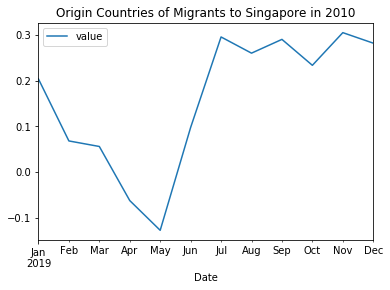

In [46]:
infilename = pathlib.Path('/Users/delatorredm/Documents/Ch3_Classification_Paper/data/vi_comparisons.csv')
infile = pd.read_csv(infilename)
infile.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

# Tidy up the dataset
tidy_df = infile.copy()
tidy_df = pd.melt(tidy_df, id_vars=['Date'], value_vars=list(tidy_df.columns[1:]))
tidy_df['Date'] = pd.to_datetime(tidy_df['Date'])

tidy_df[tidy_df['variable']=='LSWI Irrigated Rice'].plot(
    x='Date',
    y='value',
    title='Origin Countries of Migrants to Singapore in 2010')

print(tidy_df)

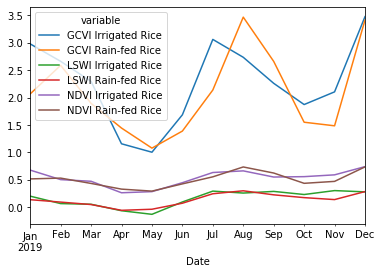

In [73]:
tidy_df_grouped = tidy_df.copy().groupby(['Date','variable']).mean().unstack()
tidy_df_grouped.columns = tidy_df_grouped.columns.get_level_values(1)
tidy_df_grouped.plot()